#  Decision Tree Classification

- **Why do we need this?**


They provide a highly effective structure within which you can lay out options and investigate the possible outcomes of choosing those options. They also help you to form a balanced picture of the risks and rewards associated with each possible course of action.


In [1]:
# Decision Tree Classification

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

In [2]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [4]:
tail(dataset)

,Age,EstimatedSalary,Purchased
395,39,59000,0
396,46,41000,1
397,51,23000,1
398,50,20000,1
399,36,33000,0
400,49,36000,1


In [5]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [6]:
tail(training_set)

,Age,EstimatedSalary,Purchased
393,45,45000,1
394,60,42000,1
396,46,41000,1
397,51,23000,1
398,50,20000,1
399,36,33000,0


In [8]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [9]:
tail(test_set)

,Age,EstimatedSalary,Purchased
380,1.86859958,-1.4171394,1
383,0.54603163,2.3104834,1
389,0.82943904,-1.0636579,1
392,0.82943904,-1.4171394,1
395,0.07368593,-0.2602909,0
400,1.01837732,-0.9993885,1


In [10]:
# Fitting Decision Tree Classification to the Training set
# install.packages('rpart')
library(rpart)
classifier = rpart(formula = Purchased ~ .,
                   data = training_set)

In [13]:
summary(classifier)

Call:
rpart(formula = Purchased ~ ., data = training_set)
  n= 300 

          CP nsplit rel error    xerror       xstd
1 0.55140187      0 1.0000000 1.0000000 0.07754006
2 0.23364486      1 0.4485981 0.4672897 0.06032684
3 0.01246106      2 0.2149533 0.2336449 0.04473958
4 0.01000000      5 0.1775701 0.2523364 0.04632536

Variable importance
            Age EstimatedSalary 
             56              44 

Node number 1: 300 observations,    complexity param=0.5514019
  predicted class=0  expected loss=0.3566667  P(node) =1
    class counts:   193   107
   probabilities: 0.643 0.357 
  left son=2 (221 obs) right son=3 (79 obs)
  Primary splits:
      Age             < 0.6724378  to the left,  improve=57.27285, (0 missing)
      EstimatedSalary < 0.5387442  to the left,  improve=47.14670, (0 missing)
  Surrogate splits:
      EstimatedSalary < 1.908675   to the left,  agree=0.747, adj=0.038, (0 split)

Node number 2: 221 observations,    complexity param=0.2336449
  predicted class=0 

In [16]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3], type = 'class')

In [20]:
head(y_pred)

2  4  5  9 12 18 
 0  0  0  0  0  0 
Levels: 0 1

In [18]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

In [21]:
cm

   y_pred
     0  1
  0 53 11
  1  6 30

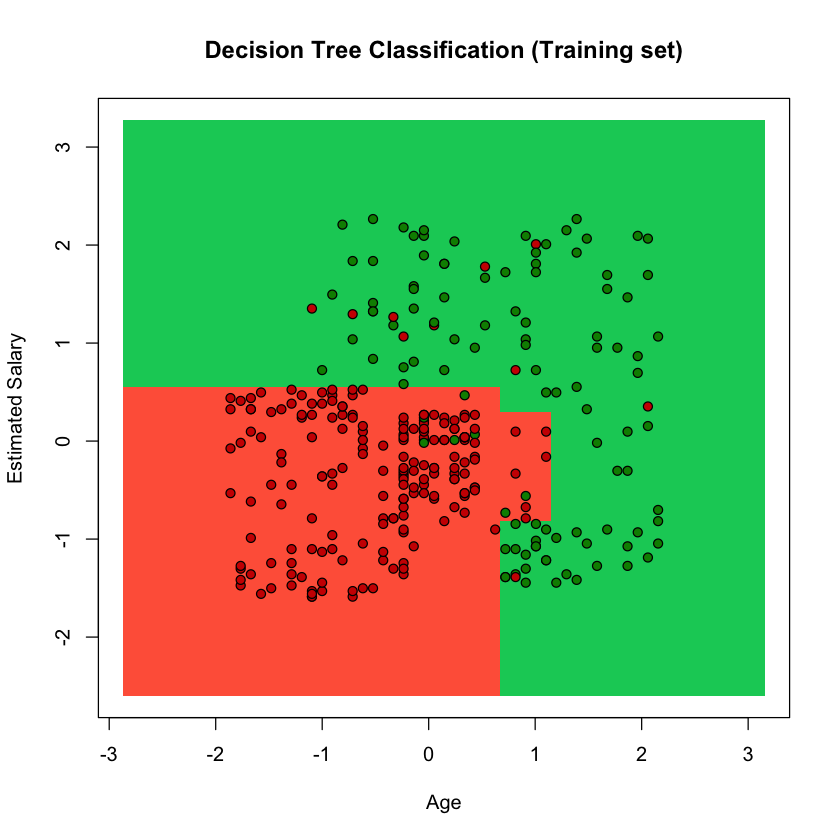

In [22]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3],
     main = 'Decision Tree Classification (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

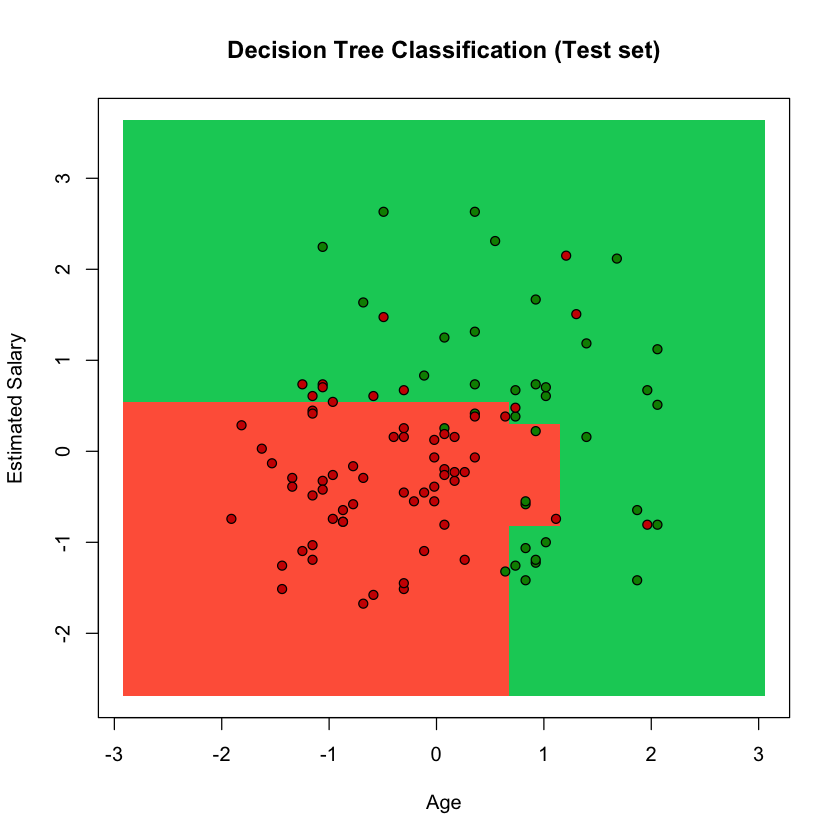

In [23]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set, type = 'class')
plot(set[, -3], main = 'Decision Tree Classification (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

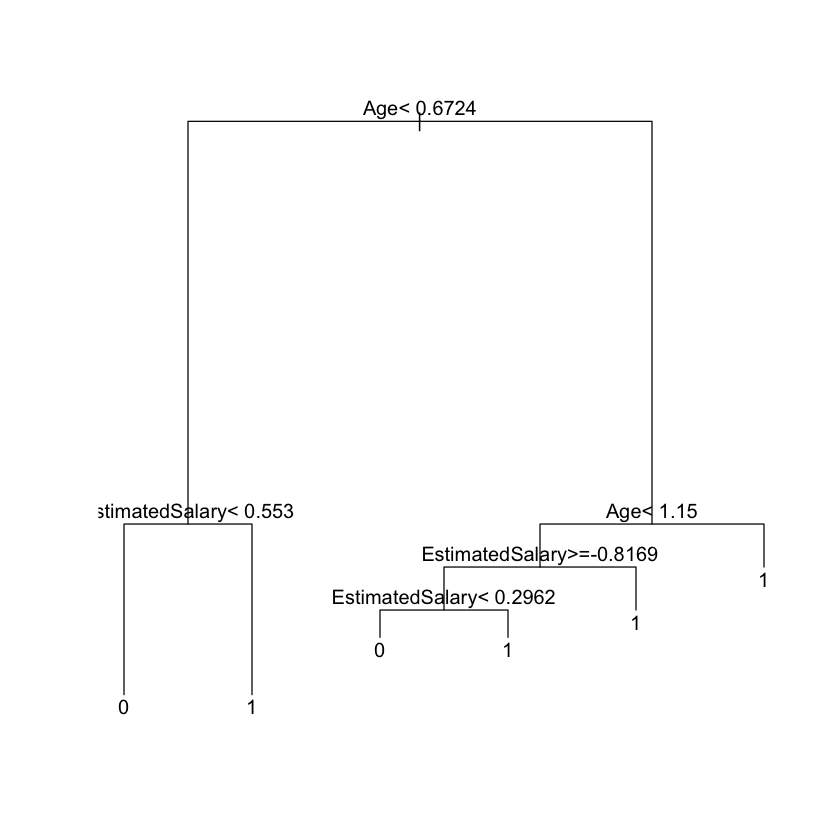

In [24]:
# Plotting the tree
plot(classifier)
text(classifier)